Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal'ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('arrhythmia.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [6]:
data.shape

(452, 280)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [9]:
#Let's see how many missing data we have and replace them with NaN's
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

408


In [10]:
#Now let's see the distribution of our missing data 
pd.isnull(data).sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       8
11      22
12       1
13     376
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
      ... 
250      0
251      0
252      0
253      0
254      0
255      0
256      0
257      0
258      0
259      0
260      0
261      0
262      0
263      0
264      0
265      0
266      0
267      0
268      0
269      0
270      0
271      0
272      0
273      0
274      0
275      0
276      0
277      0
278      0
279      0
Length: 280, dtype: int64

In [11]:
#dropping column 13
data.drop(columns = 13, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [12]:
#Replacing 
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [13]:
#data.columns = X_columns
#data.head()
#data[279]

In [14]:
#Noticed that there's 1 additional column. Number of attributes should've been 278 (279-1)
#Dropping column 279
data.drop(columns = 279, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [15]:
data.columns = X_columns
data.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


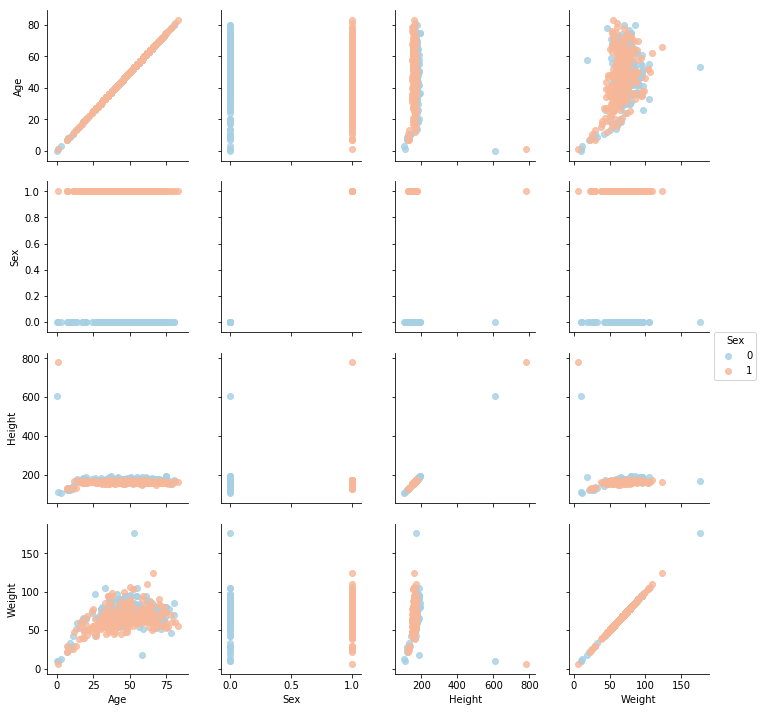

In [16]:
g = sns.PairGrid(data, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

In [17]:
data['Height'].value_counts()

160    81
165    46
170    40
155    23
175    21
156    19
163    16
162    15
168    15
172    14
157    10
176    10
166     9
164     9
178     9
158     9
150     9
171     9
167     8
169     7
173     7
159     6
153     5
161     5
174     4
177     4
180     4
154     4
185     3
190     3
186     3
130     2
182     2
120     2
110     1
119     1
124     1
105     1
127     1
138     1
132     1
133     1
780     1
140     1
146     1
148     1
149     1
152     1
179     1
181     1
184     1
188     1
608     1
Name: Height, dtype: int64

In [18]:
data['Height']=data['Height'].replace(608,108)
data['Height']=data['Height'].replace(780,180)

In [19]:
sorted(data['Weight'], reverse=True)
# Looks like 176 kgs is possible for a 50+ aged man

[176,
 124,
 110,
 106,
 105,
 105,
 104,
 104,
 100,
 98,
 97,
 97,
 96,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 94,
 94,
 94,
 94,
 94,
 93,
 91,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 89,
 89,
 88,
 88,
 88,
 88,
 87,
 86,
 86,
 86,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 84,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 83,
 83,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 82,
 81,
 81,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 

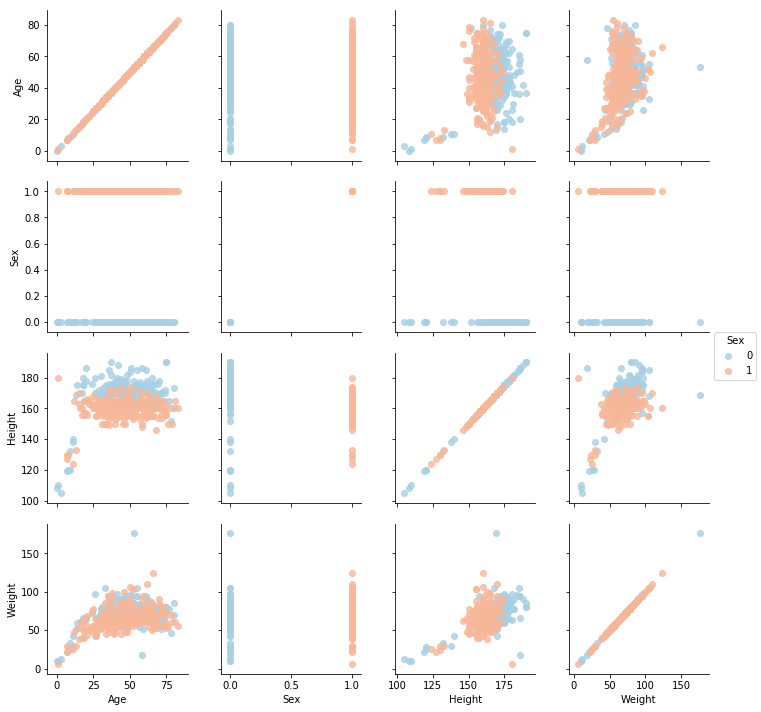

In [20]:
g = sns.PairGrid(data, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

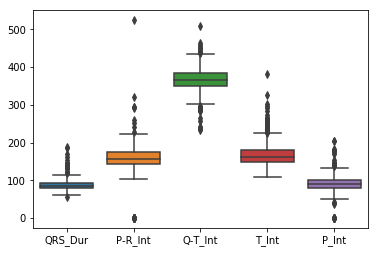

In [21]:
sns.boxplot(data=data[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])
#sns.swarmplot(data=data[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])

Below is the schematic representation of normal EKG which might help us better understand the data.

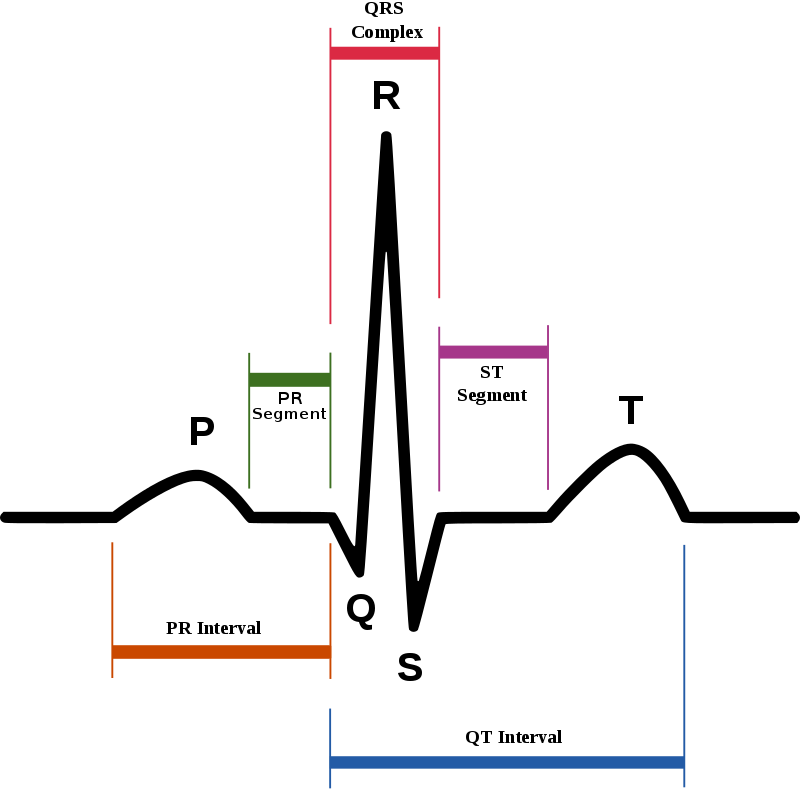

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave  until the beginning of the QRS complex; it is normally between 120 and 200ms in duration. 

In [22]:
data['P-R_Int'].value_counts().sort_index()

0      18
103     1
105     1
106     2
109     1
113     1
114     1
115     1
117     1
118     4
120     1
121     3
122     4
123     3
124     3
125     3
126     4
127     2
128     4
129     3
130     3
131     3
132     5
133     4
134     2
135     7
136     6
137     7
138     2
139     4
       ..
187     3
188     3
191     5
192     1
193     2
194     3
195     3
196     3
197     3
198     3
199     3
200     3
201     1
202     2
203     2
204     2
205     2
209     1
213     1
216     2
217     1
224     1
228     1
240     1
251     1
259     1
292     1
294     2
320     1
524     1
Name: P-R_Int, Length: 106, dtype: int64

In [23]:
#PR Interval data's including outliers 0(x18) and 524. I'll keep them for now

QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval data.

In [24]:
data['T_Int'].value_counts().sort_index(ascending=False)

381    1
327    1
301    1
297    1
292    1
283    1
273    1
266    2
264    1
262    1
261    1
260    1
258    1
255    1
254    1
253    1
251    2
250    1
249    1
248    1
247    1
245    2
244    1
243    2
242    1
241    1
237    1
235    3
231    1
229    2
      ..
145    2
144    6
143    8
142    7
141    7
140    3
139    5
138    7
137    9
136    3
135    4
134    2
133    3
132    4
131    2
130    3
129    1
128    2
127    3
126    1
125    2
123    1
122    3
121    1
120    1
117    2
116    1
113    1
111    1
108    1
Name: T_Int, Length: 129, dtype: int64

In [25]:
# Looks like 381 is an outlier value for T-interval. I want to keep it

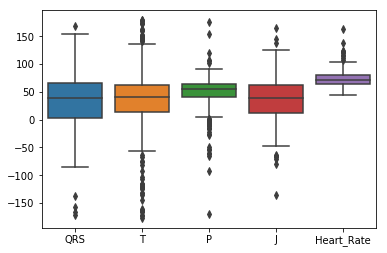

In [26]:
sns.boxplot(data=data[["QRS","T","P","J","Heart_Rate"]])
#sns.swarmplot(data=data[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])

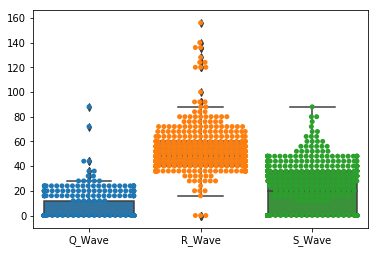

In [27]:
sns.boxplot(data=data[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=data[["Q_Wave","R_Wave","S_Wave"]])

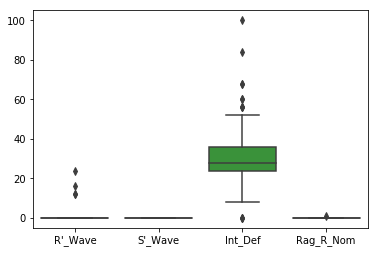

In [28]:
sns.boxplot(data=data[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])
#sns.swarmplot(data=data[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

In [29]:
data["R'_Wave"].value_counts().sort_index(ascending=False)

24      1
16      1
12      2
0     448
Name: R'_Wave, dtype: int64

In [30]:
data["S'_Wave"].value_counts().sort_index(ascending=False)

0    452
Name: S'_Wave, dtype: int64

In [31]:
data["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1      1
0    451
Name: Rag_R_Nom, dtype: int64

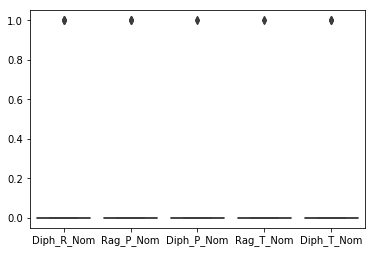

In [32]:
sns.boxplot(data=data[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]])

In [36]:
data["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1      5
0    447
Name: Rag_P_Nom, dtype: int64

In [34]:
data["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1      5
0    447
Name: Rag_P_Nom, dtype: int64

In [37]:
data["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: Diph_P_Nom, dtype: int64

In [38]:
data["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: Rag_T_Nom, dtype: int64

In [40]:
data["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1      4
0    448
Name: Diph_T_Nom, dtype: int64

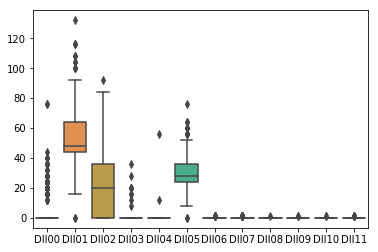

In [41]:
sns.boxplot(data=data[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]])

In [42]:
data["DII00"].value_counts().sort_index(ascending=False)

76      2
44      1
40      3
36      6
32      3
28      9
24     28
20     39
16     10
12      4
0     347
Name: DII00, dtype: int64

In [43]:
data["DII03"].value_counts().sort_index(ascending=False)

36      1
28      1
20      4
16      2
12      1
8       1
0     442
Name: DII03, dtype: int64

In [44]:
data["DII04"].value_counts().sort_index(ascending=False)

56      1
12      1
0     450
Name: DII04, dtype: int64

In [49]:
data["DII06"].value_counts().sort_index(ascending=False)

1      8
0    444
Name: DII06, dtype: int64

In [50]:
data["DII07"].value_counts().sort_index(ascending=False)

1     13
0    439
Name: DII07, dtype: int64

In [51]:
data["DII08"].value_counts().sort_index(ascending=False)

1      1
0    451
Name: DII08, dtype: int64

In [52]:
data["DII09"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: DII09, dtype: int64

In [53]:
data["DII10"].value_counts().sort_index(ascending=False)

1      2
0    450
Name: DII10, dtype: int64

In [54]:
data["DII11"].value_counts().sort_index(ascending=False)

1      7
0    445
Name: DII11, dtype: int64

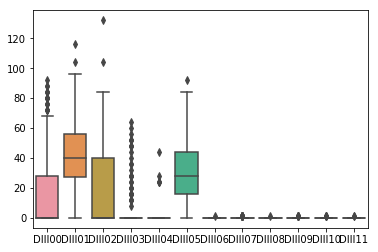

In [55]:
sns.boxplot(data=data[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11"]])

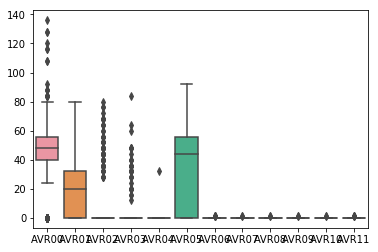

In [56]:
sns.boxplot(data=data[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]])

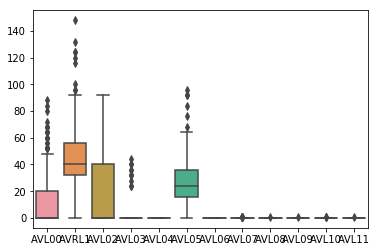

In [57]:
sns.boxplot(data=data[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]])

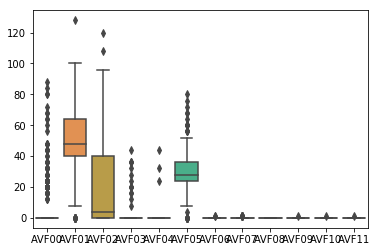

In [59]:
sns.boxplot(data=data[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]])